In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


In [14]:
data = pd.read_csv("/kaggle/input/pokemon/Pokemon.csv")

In [15]:
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [16]:
data.shape

(800, 13)

In [17]:
data1 = data.drop(columns = ["#","Name","Type 2"])

In [18]:
data1.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,False
1,Grass,405,60,62,63,80,80,60,1,False
2,Grass,525,80,82,83,100,100,80,1,False
3,Grass,625,80,100,123,122,120,80,1,False
4,Fire,309,39,52,43,60,50,65,1,False


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Total       800 non-null    int64 
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(1)
memory usage: 57.2+ KB


In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Total       800 non-null    int64 
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(1)
memory usage: 57.2+ KB


In [21]:
std = StandardScaler()
data1.iloc[:,1:9] = std.fit_transform(data1.iloc[:,1:9])

In [22]:
data1

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,False
1,Grass,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,False
2,Grass,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,False
3,Grass,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,False
4,Fire,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,False
...,...,...,...,...,...,...,...,...,...,...
795,Rock,1.375429,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341,1.611954,True
796,Rock,2.209541,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611,1.611954,True
797,Psychic,1.375429,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310,1.611954,True
798,Psychic,2.042718,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635,1.611954,True


In [23]:
data1 = pd.get_dummies(data1)

In [24]:
data1.shape

(800, 27)

In [25]:
data1

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,...,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,False,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,False,0,...,0,1,0,0,0,0,0,0,0,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,False,0,...,0,1,0,0,0,0,0,0,0,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,False,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.375429,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341,1.611954,True,0,...,0,0,0,0,0,0,0,1,0,0
796,2.209541,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611,1.611954,True,0,...,0,0,0,0,0,0,0,1,0,0
797,1.375429,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310,1.611954,True,0,...,0,0,0,0,0,0,1,0,0,0
798,2.042718,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635,1.611954,True,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
cols = data1.columns.tolist()
cols.insert(26,cols.pop(cols.index("Legendary")))
data1 = data1.reindex(columns = cols)

In [27]:
data1

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,...,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Legendary
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,0,0,...,1,0,0,0,0,0,0,0,0,False
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,0,0,...,1,0,0,0,0,0,0,0,0,False
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,0,0,...,1,0,0,0,0,0,0,0,0,False
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,0,0,...,1,0,0,0,0,0,0,0,0,False
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.375429,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341,1.611954,0,0,...,0,0,0,0,0,0,1,0,0,True
796,2.209541,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611,1.611954,0,0,...,0,0,0,0,0,0,1,0,0,True
797,1.375429,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310,1.611954,0,0,...,0,0,0,0,0,1,0,0,0,True
798,2.042718,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635,1.611954,0,0,...,0,0,0,0,0,1,0,0,0,True


In [28]:
lb = LabelEncoder()
data1["Legendary"] = lb.fit_transform(data1["Legendary"])

In [29]:
data1

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,...,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Legendary
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.375429,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341,1.611954,0,0,...,0,0,0,0,0,0,1,0,0,1
796,2.209541,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611,1.611954,0,0,...,0,0,0,0,0,0,1,0,0,1
797,1.375429,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310,1.611954,0,0,...,0,0,0,0,0,1,0,0,0,1
798,2.042718,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635,1.611954,0,0,...,0,0,0,0,0,1,0,0,0,1


In [30]:
X = data1.drop(columns = ["Legendary"]).values
y = data1["Legendary"].values

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

In [32]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred_test = lg.predict(X_test)
y_pred_train = lg.predict(X_train)

In [33]:
def accuracy(y_pred_train,y_train,y_pred_test,y_test):
    print("Accuracy score on training set : {}".format(accuracy_score(y_pred_train,y_train)))
    print("Accuracy score on test set : {}".format(accuracy_score(y_pred_test,y_test)))

In [34]:
accuracy(y_pred_train,y_train,y_pred_test,y_test)

Accuracy score on training set : 0.965625
Accuracy score on test set : 0.9375


In [35]:
pca = PCA(n_components = 2)
X_train_new = pca.fit_transform(X_train)
X1 = X_train_new

In [45]:
def decision_boundary(model,X1,y_train):
    a = np.arange(X1[:,0].min()-1,X1[:,0].max()+1,step = 0.01)
    b = np.arange(X1[:,1].min()-1,X1[:,1].max()+1,step = 0.01)
    XX,YY = np.meshgrid(a,b)
    lg1 = model().fit(X1,y_train)
    input_array = np.array([XX.ravel(),YY.ravel()]).T
    Z = lg1.predict(input_array)
    Z = np.reshape(Z,XX.shape)
    plt.contourf(XX,YY,Z);
    plt.scatter(X1[:,0],X1[:,1],c = y_train);

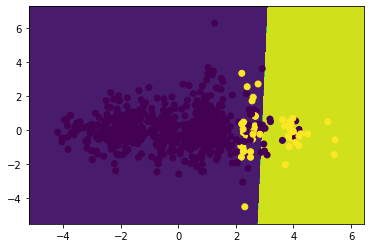

In [46]:
decision_boundary(LogisticRegression,X1,y_train)

In [41]:
from sklearn.svm import SVC


In [52]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred_test2 = svm.predict(X_test)
y_pred_train2 = svm.predict(X_train)

In [53]:
accuracy(y_pred_train2,y_train,y_pred_test2,y_test)

Accuracy score on training set : 0.9828125
Accuracy score on test set : 0.93125


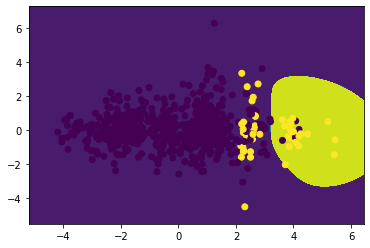

In [54]:
decision_boundary(SVC,X1,y_train)

In [68]:
c = [i for i in range(1,47,5)]
c

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]

In [71]:
degree = [i for i in range(1,11,1)]
degree

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [72]:
param = [{"C":c,
         "kernel" : ["linear"]},
        {"C":c,"kernel" : ["rbf"],"gamma" : [0.0001,0.001,0.01,0.1,1]},
         {"C":c,"kernel" : ["poly"],"gamma" : [0.0001,0.001,0.01,0.1,1],"degree": degree}
        ]

In [147]:
gs = GridSearchCV(estimator = svm,
                 param_grid = param,
                 scoring = "accuracy",
                 cv = 10,
                 n_jobs = -1)

gs = gs.fit(X_train,y_train)

In [148]:
gs.best_params_

{'C': 6, 'degree': 5, 'gamma': 0.1, 'kernel': 'poly'}

In [152]:
svm1 = SVC(C = 5,kernel = "rbf",gamma = 0.01).fit(X_train,y_train)
y_pred_train3 = svm1.predict(X_train)
y_pred_test3 = svm1.predict(X_test)
accuracy(y_pred_train3,y_train,y_pred_test3,y_test)

Accuracy score on training set : 0.9578125
Accuracy score on test set : 0.93125


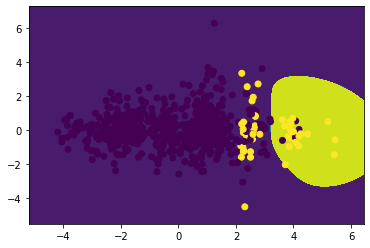

In [153]:
decision_boundary(SVC,X1,y_train)

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
dt = DecisionTreeClassifier(min_samples_leaf = 4,max_depth = 4).fit(X_train,y_train)
y_pred_train4 = dt.predict(X_train)
y_pred_test4 = dt.predict(X_test)
accuracy(y_pred_train4,y_train,y_pred_test4,y_test)

Accuracy score on training set : 0.96875
Accuracy score on test set : 0.96875


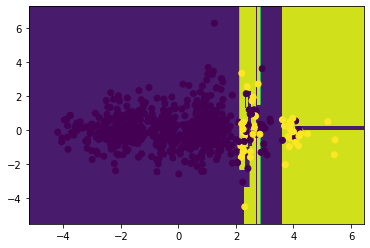

In [174]:
decision_boundary(DecisionTreeClassifier,X1,y_train)